# Aramco Experiment
## Reading and sorting data

### Loading package and data
Here I load the obspy, numpy and matplotlib packages for reading segy files, sorting and plotting data.

In [1]:
%matplotlib inline

'''
script to read, sort and save Aramco time-domain data
'''
# import numpy as np
from obspy.io.segy.core import _read_segy
import numpy as np
import matplotlib.pyplot as plt

# make fonts look latexy
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['mathtext.fontset'] = "cm"
DATA = _read_segy("synthetic.ricker.50Hz.sgy")

### Trace info
For a specific trace number, this method outputs the source x and y positions and elevation info. It also outputs the same infor for the receiver.

In [2]:
def get_trace_info(trace_num, data=DATA):
    '''
    :param trace_num: index of trace to extract info from
    :param data: the sgy data that contains all the traces
    :return: prints all the relevant info of this trace
    '''
    print('----------------------------')
    print('Source no. ' + str(trace_num) + ' info:')
    print('----------------------------')
    print('source x position: ' +
          str(data[trace_num].
              stats.segy.trace_header.source_coordinate_x))
    print('source y position: ' +
          str(data[trace_num].
              stats.segy.trace_header.source_coordinate_y))
    print('receiver x position: ' +
          str(data[trace_num].
              stats.segy.trace_header.group_coordinate_x))
    print('receiver y position: ' +
          str(data[trace_num].
              stats.segy.trace_header.group_coordinate_y))
    print('source elevation: ' +
          str(data[trace_num].
              stats.segy.trace_header.surface_elevation_at_source))
    print('receiver elevation: ' +
          str(data[trace_num].
              stats.segy.trace_header.receiver_group_elevation))
    print('\n')

### Trace plot
Given a trace number, I plot that trace where the $x$ axis is the time and the $y$ axis is the amplitude.

In [3]:
def plot_trace(trace_num, data=DATA):
    '''
    :param trace_num: index of trace to extract info from
    :param data: the sgy data that contains all the traces
    :return: plots the input trace
    '''
    data[trace_num].plot()

### First trace plot
Here trace number is $(10 + 10 * 122 + 2 * 122 * 122)$ where this is (receiver_index_in_x + receiver_index_in_y * number_of_receivers_in_x + source_index * total_number_of_receivers)

Here, I show info for a receiver at the index $(10,10)$ and for source number $2$. The receiver is close to the source, so I am expecting to get **early first arrivals**.

----------------------------
Source no. 30998 info:
----------------------------
source x position: 225
source y position: 2725
receiver x position: 1000
receiver y position: 2100
source elevation: 569
receiver elevation: 584




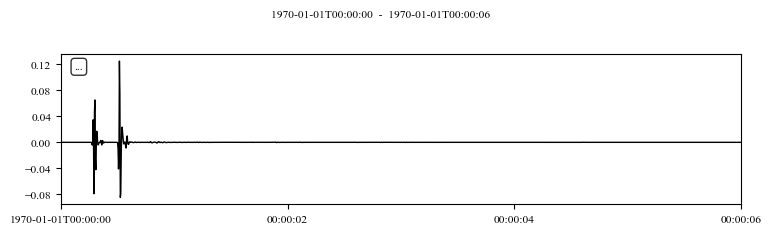

In [4]:
get_trace_info(10 + 10 * 122 + 2 * 122 * 122)
plot_trace(10 + 10 * 122 + 2 * 122 * 122)

### Second trace plot
Here trace number is $(10 + 10 * 122 + 58 * 122 * 122)$ where this is (receiver_index_in_x + receiver_index_in_y * number_of_receivers_in_x + source_index * total_number_of_receivers)

Here, I show info for a receiver at the index $(10,10)$ and for source number $58$. The receiver is far from the source, so I am expecting to get **late first arrivals which I do**.

----------------------------
Source no. 864502 info:
----------------------------
source x position: 5825
source y position: 2725
receiver x position: 1000
receiver y position: 2100
source elevation: 577
receiver elevation: 584




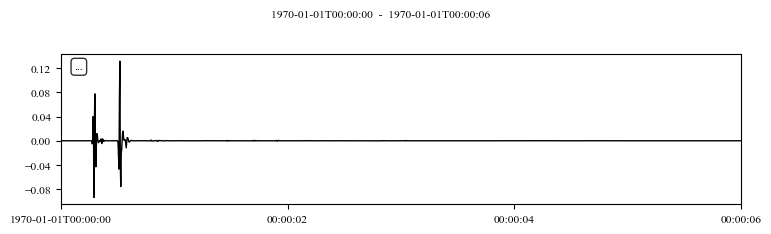

In [5]:
get_trace_info(10 + 10 * 122 + 58 * 122 * 122)
plot_trace(10 + 10 * 122 + 58 * 122 * 122)